## CIND 820 - Big Data Analytics Project  
### Final Results and Code
### Due on December 05, 2022 11:59 PM


####[Kabir Chauhan (501182498)]


*****


### **I) Data Preparation**

In [2]:
#import the dataset and appropriate modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pdac = pd.read_csv("Debernardi et al 2020 data.csv", sep =",")

#print the row count
print("The row count for the PDAC dataset is:", len(pdac))

The row count for the PDAC dataset is: 590


In [3]:
#summary of dataset
pdac.info()
pdac.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   sample_id                590 non-null    object 
 1   patient_cohort           590 non-null    object 
 2   sample_origin            590 non-null    object 
 3   age                      590 non-null    int64  
 4   sex                      590 non-null    object 
 5   diagnosis                590 non-null    int64  
 6   stage                    199 non-null    object 
 7   benign_sample_diagnosis  208 non-null    object 
 8   plasma_CA19_9            350 non-null    float64
 9   creatinine               590 non-null    float64
 10  LYVE1                    590 non-null    float64
 11  REG1B                    590 non-null    float64
 12  TFF1                     590 non-null    float64
 13  REG1A                    306 non-null    float64
dtypes: float64(6), int64(2), o

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [4]:
#check the data types of attributes
print(pdac.dtypes)

sample_id                   object
patient_cohort              object
sample_origin               object
age                          int64
sex                         object
diagnosis                    int64
stage                       object
benign_sample_diagnosis     object
plasma_CA19_9              float64
creatinine                 float64
LYVE1                      float64
REG1B                      float64
TFF1                       float64
REG1A                      float64
dtype: object


In [5]:
#check for missing values
pdac.isnull().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [6]:
#remove the unused columns in a new dataframe and rename columns
pdac_modified = pdac.drop(columns=['sample_id','patient_cohort','sample_origin','stage','benign_sample_diagnosis'])

pdac_modified = pdac_modified.rename(columns={'diagnosis':'dx','plasma_CA19_9':'CA19','creatinine':'CREAT'})
pdac_modified.head()

,age,sex,dx,CA19,CREAT,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,81,F,1,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,51,M,1,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,61,M,1,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,62,M,1,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [7]:
#call a function to replace missing values with the mean value for each respective column
for i in pdac_modified:
    if i!='sex':
        pdac_modified[i] = pdac_modified[i].fillna(pdac_modified[i].mean())

pdac_modified.head()

,age,sex,dx,CA19,CREAT,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,11.700000,1.83222,0.893219,52.94884,654.282174,1262.000000
1,81,F,1,654.002944,0.97266,2.037585,94.46703,209.488250,228.407000
2,51,M,1,7.000000,0.78039,0.145589,102.36600,461.141000,735.281222
3,61,M,1,8.000000,0.70122,0.002805,60.57900,142.950000,735.281222
4,62,M,1,9.000000,0.21489,0.000860,65.54000,41.088000,735.281222


In [8]:
#confirm no missing values
pdac_modified.isnull().sum()

age      0
sex      0
dx       0
CA19     0
CREAT    0
LYVE1    0
REG1B    0
TFF1     0
REG1A    0
dtype: int64

### **II) Data Exploration**

In [9]:
#check for correlation between biomarkers
pdac_modified[pdac_modified.columns[3:]].corr()

,CA19,CREAT,LYVE1,REG1B,TFF1,REG1A
CA19,1.000000,-0.023064,0.204001,0.134020,0.132608,0.108028
CREAT,-0.023064,1.000000,0.338533,0.261906,0.397795,0.045632
LYVE1,0.204001,0.338533,1.000000,0.543075,0.577363,0.201722
REG1B,0.134020,0.261906,0.543075,1.000000,0.690228,0.347205
TFF1,0.132608,0.397795,0.577363,0.690228,1.000000,0.268068
REG1A,0.108028,0.045632,0.201722,0.347205,0.268068,1.000000


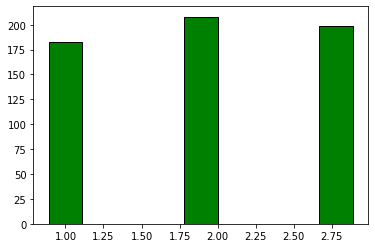

In [10]:
#visualize the distribution of 'diagnosis' in the population 

a, ax = plt.subplots()
plt.hist(pdac_modified['dx'], bins=9, align='left', color='green', edgecolor='black')
a.savefig('myimage.svg', format='svg', dpi=1200)

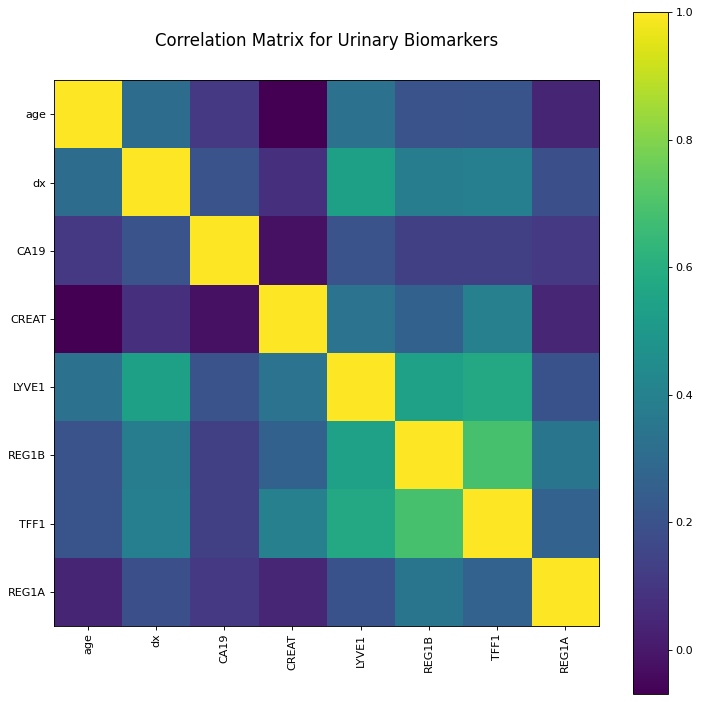

In [11]:
#call a function to visualize the correlation between different biomarkers
def correlationMatrix(df, graphWidth):

    
    df = df[[col for col in df if df[col].nunique() > 1]] #keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title('Correlation Matrix for Urinary Biomarkers', fontsize=15)
    plt.show()

correlationMatrix(pdac_modified, 11)

<ipython-input-12-afc7327ebbca>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


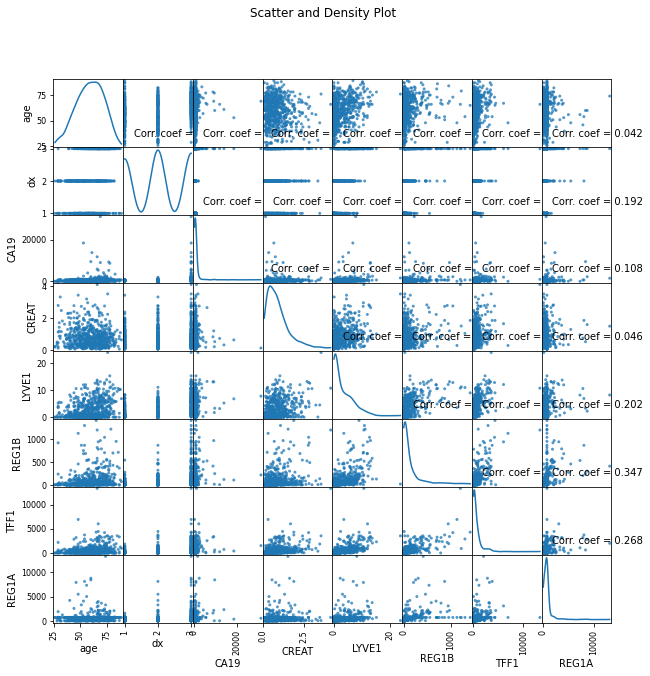

In [12]:
#call a function to visualize the correlation between biomarkers and other attributes
def plotMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) #use only numerical columns
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] #only keep columns with >1 unique value
    
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotMatrix(pdac_modified, 10, 10)

In [13]:
#normalize the dataset and concatenate with discrete variables
s1,s0 = np.split(pdac_modified,[3],axis=1)
normalized_pdac = pd.concat([s1,(s0 - s0.min()) / (s0.max() - s0.min())],axis=1)

normalized_pdac.head()

,age,sex,dx,CA19,CREAT,LYVE1,REG1B,TFF1,REG1A
0,33,F,1,0.000377,0.437326,0.037383,0.037715,0.04903,0.095606
1,81,F,1,0.021097,0.225627,0.085284,0.067288,0.015698,0.017304
2,51,M,1,0.000226,0.178273,0.006089,0.072915,0.034557,0.055703
3,61,M,1,0.000258,0.158774,0.000112,0.04315,0.010712,0.055703
4,62,M,1,0.00029,0.038997,0.000031,0.046684,0.003079,0.055703


Text(0, 0.5, 'Age')

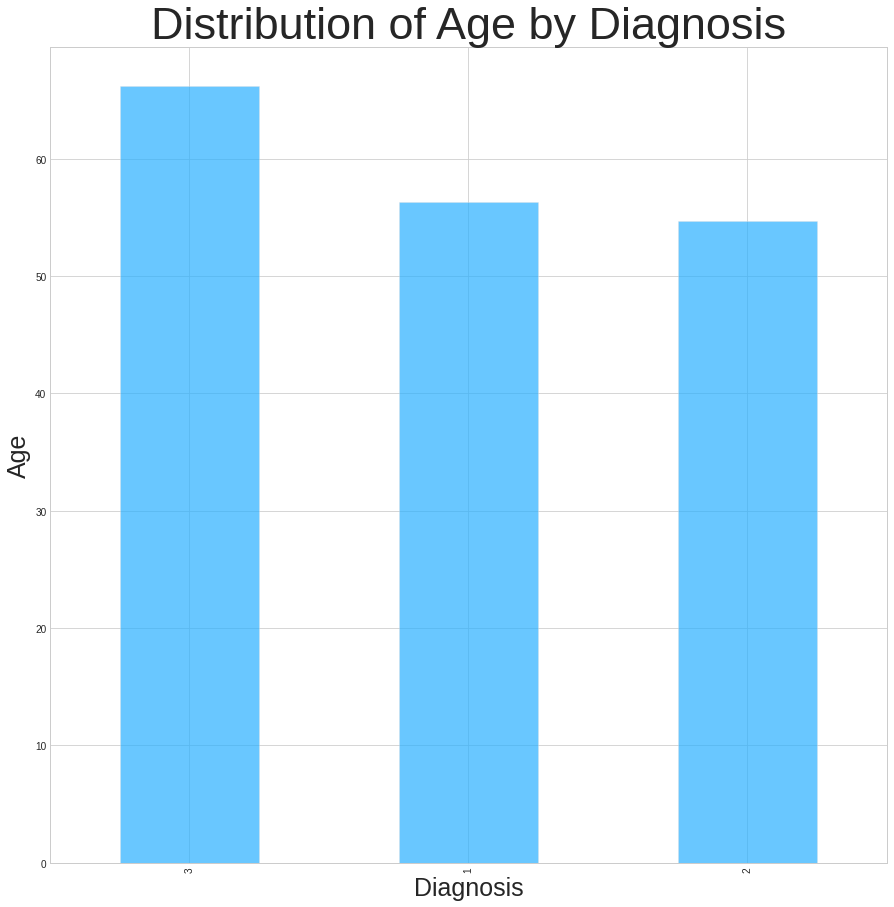

In [14]:
#visualize the distribution of age by diagnosis in the dataset
plt.figure(figsize=(15,15))
plt.style.use('seaborn-whitegrid')
plot1 = normalized_pdac.groupby('dx')['age'].mean().nlargest(50).plot.bar(facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.title('Distribution of Age by Diagnosis', size = 45)
plt.xlabel('Diagnosis', size = 25)
plt.ylabel('Age', size = 25)

Text(0, 0.5, 'Diagnosis')

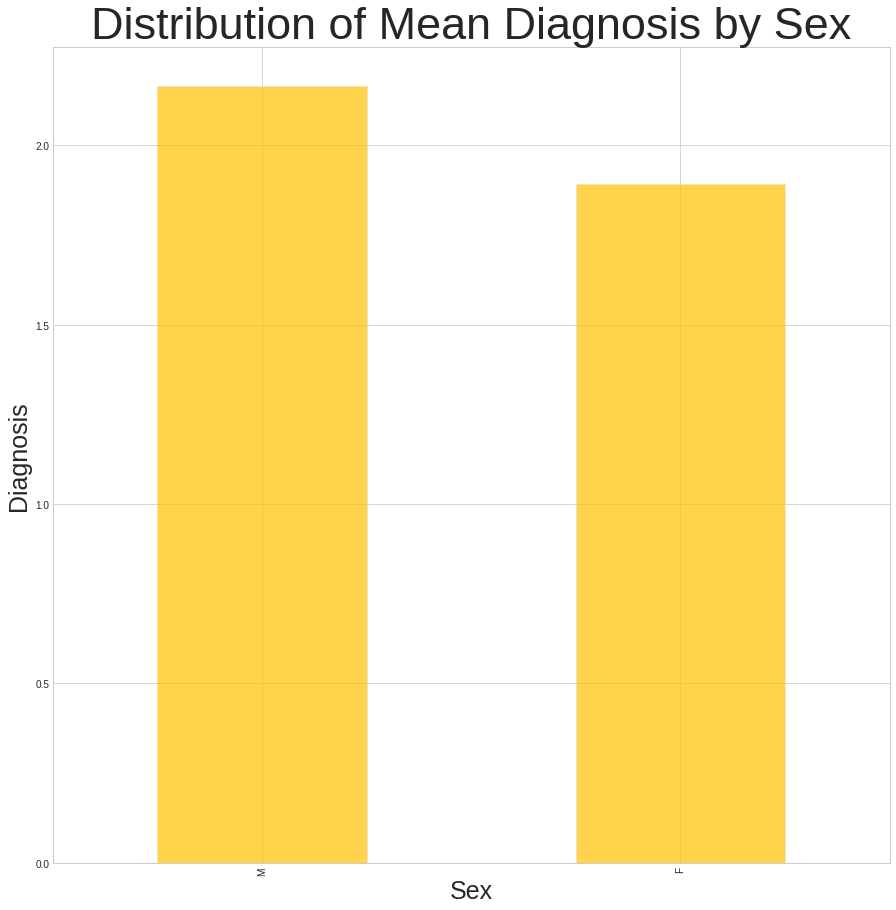

In [15]:
#visualize the distribution of diagnosis by gender in the dataset
plt.figure(figsize=(15,15))

plot2 = normalized_pdac.groupby('sex')['dx'].mean().nlargest(20).plot.bar(facecolor='#ffc300', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.title('Distribution of Mean Diagnosis by Sex', size = 45)
plt.xlabel('Sex', size = 25)
plt.ylabel('Diagnosis', size = 25)

Text(0, 0.5, 'Diagnosis')

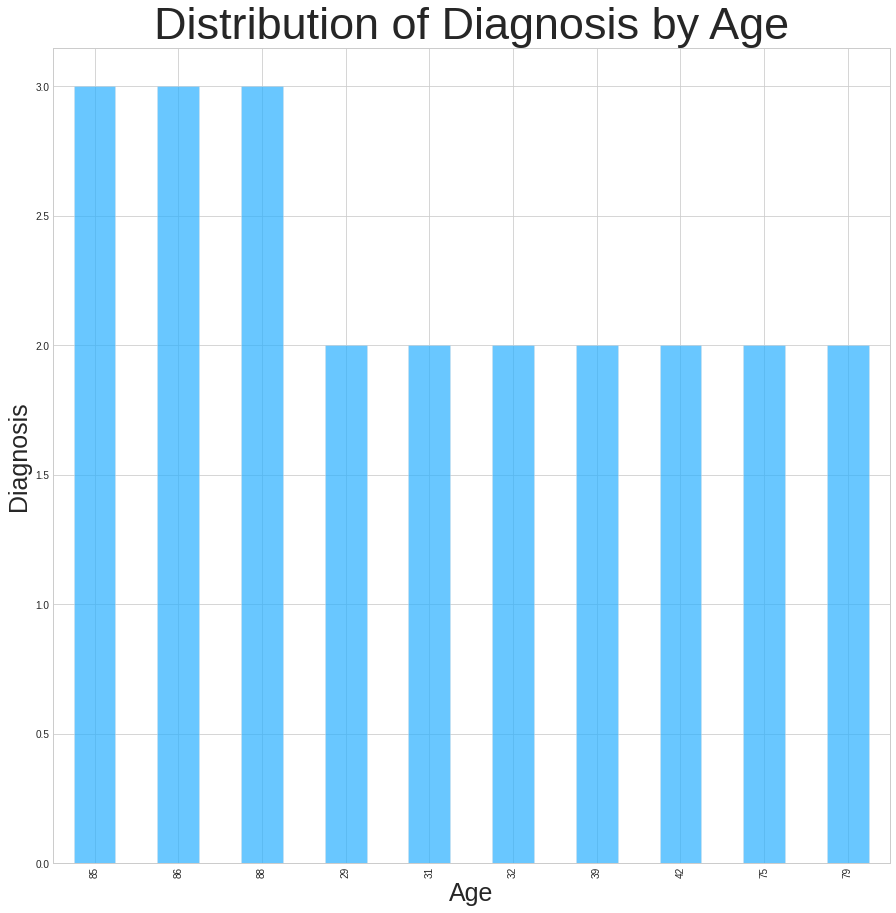

In [16]:
# Calculate the min by group age and diagnosis
plt.figure(figsize=(15,15))
plot3 = normalized_pdac.groupby('age')['dx'].min().nlargest(10).plot.bar(facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)
plt.title('Distribution of Diagnosis by Age', size = 45)
plt.xlabel('Age', size = 25)
plt.ylabel('Diagnosis', size = 25)

Text(0.5, 1.08, 'Pairwise Plot of Urinary Biomarkers')

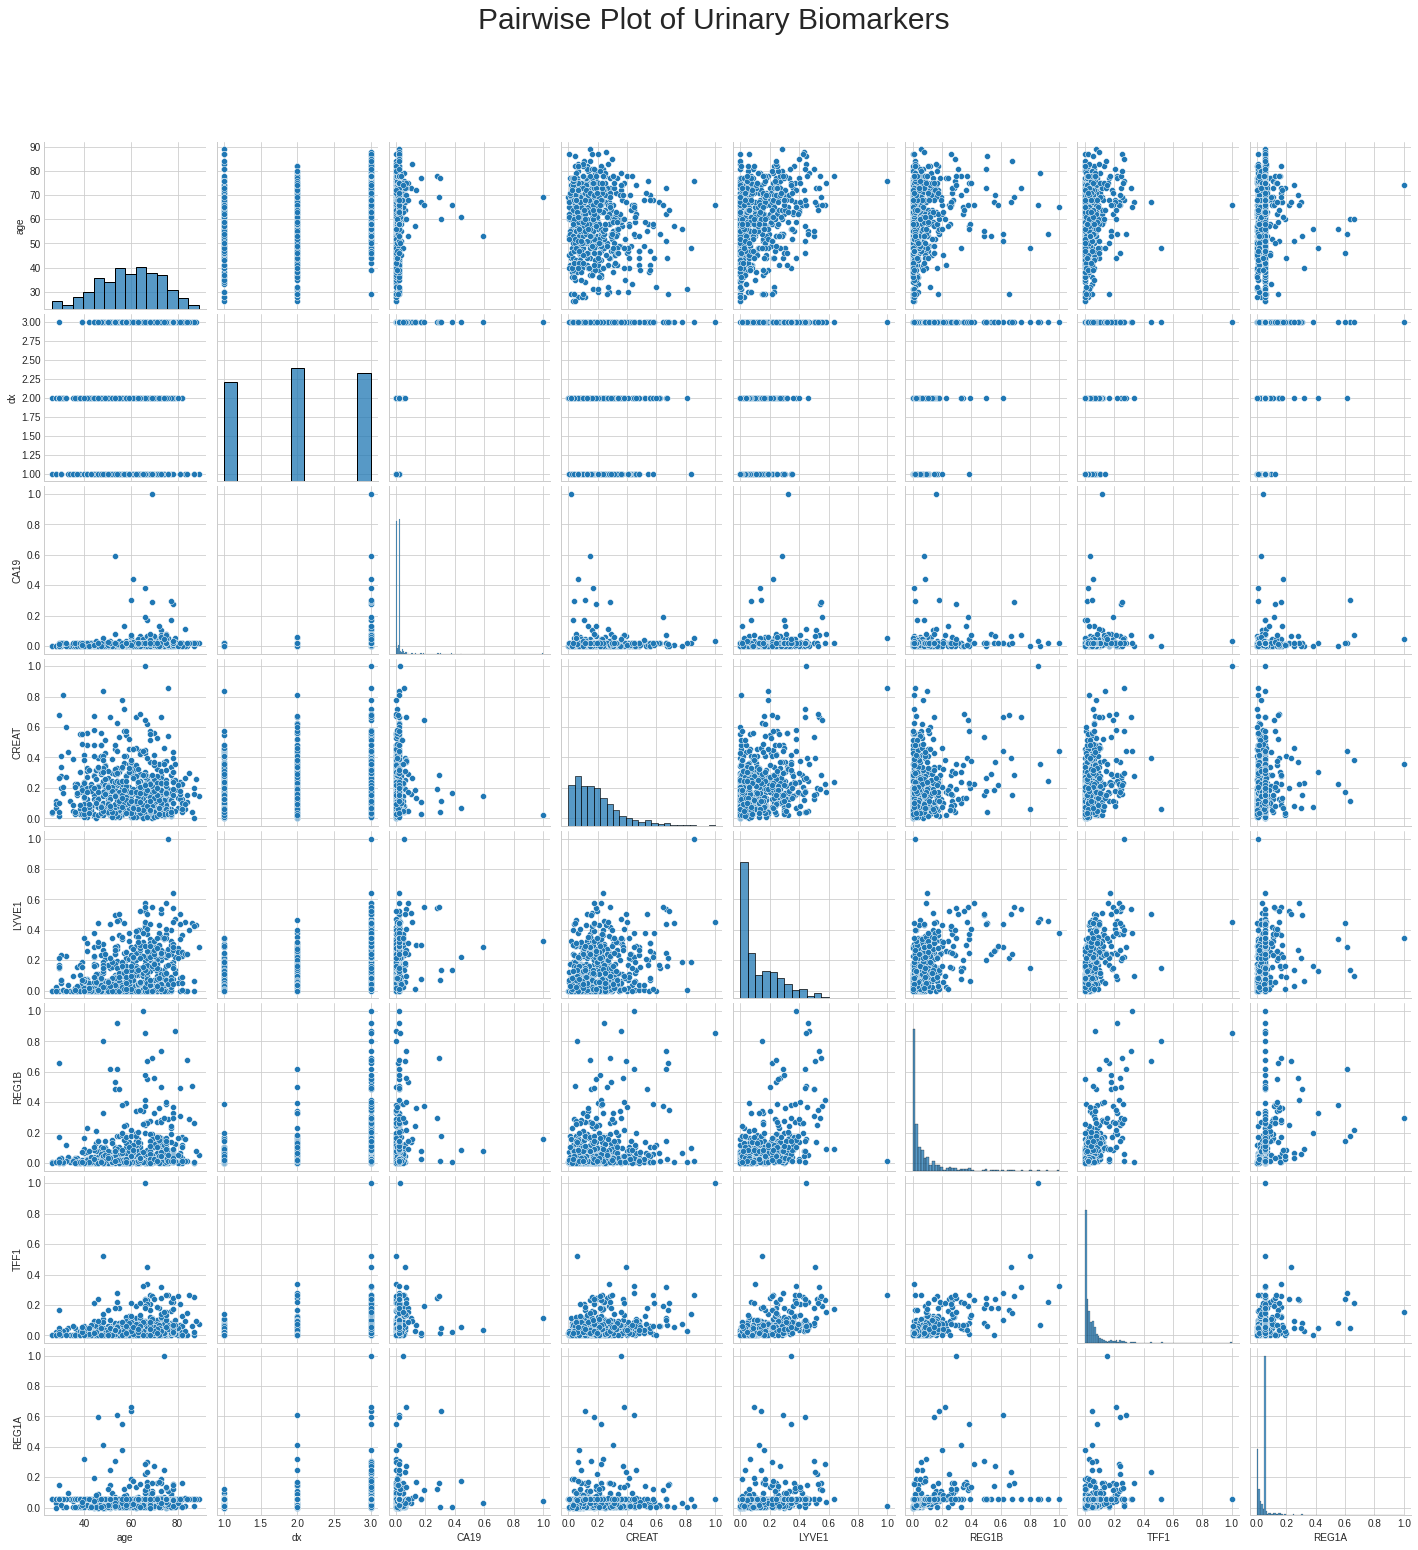

In [17]:
plot4 = sns.pairplot(normalized_pdac)
sns.set_context("paper", rc={"axes.labelsize":25})
plot4.fig.suptitle('Pairwise Plot of Urinary Biomarkers', y=1.08, size = 30) 

### **III) Classification Machine Learning Algorithms**

#### **a) Algorithm 1 - Decision Tree**



In [18]:
#convert the nominal gender variable to numeric
normalized_pdac['sex'].replace({'M':1, 'F':0}, inplace=True)

normalized_pdac.head()

,age,sex,dx,CA19,CREAT,LYVE1,REG1B,TFF1,REG1A
0,33,0,1,0.000377,0.437326,0.037383,0.037715,0.04903,0.095606
1,81,0,1,0.021097,0.225627,0.085284,0.067288,0.015698,0.017304
2,51,1,1,0.000226,0.178273,0.006089,0.072915,0.034557,0.055703
3,61,1,1,0.000258,0.158774,0.000112,0.04315,0.010712,0.055703
4,62,1,1,0.00029,0.038997,0.000031,0.046684,0.003079,0.055703


In [19]:
#time the execution of the code over 5 runs and 1000 loops
#%%timeit -r5 -n1000

#implement a train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(normalized_pdac[normalized_pdac.columns[3:8]], normalized_pdac[normalized_pdac.columns[2]], test_size = 0.2, random_state = 25)

#apply feature scaling to dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#fit Decision Tree classifier to the dataset
from sklearn.tree import DecisionTreeClassifier

y_train = y_train.astype('int')
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [20]:
#demonstrate prediction
pred_dt = dt.predict(X_test)
print(pred_dt[:5])

[1 3 2 1 1]


In [21]:
#%%timeit -r1 -n1
#implment stratified k-fold cross validation
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

kf_dt = StratifiedKFold(n_splits=10, shuffle=True, random_state=25)
cnt = 1
for train_index, test_index in kf_dt.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 424, Test set:48
Fold:2, Train set: 424, Test set:48
Fold:3, Train set: 425, Test set:47
Fold:4, Train set: 425, Test set:47
Fold:5, Train set: 425, Test set:47
Fold:6, Train set: 425, Test set:47
Fold:7, Train set: 425, Test set:47
Fold:8, Train set: 425, Test set:47
Fold:9, Train set: 425, Test set:47
Fold:10, Train set: 425, Test set:47


In [22]:
#obtain the scores for each fold and the average
score_dt = cross_val_score(DecisionTreeClassifier(random_state= 25), X_train, y_train, cv=kf_dt, scoring="accuracy")

print(f'Scores for each fold are: {score_dt}')
print(f'Average score: {"{:.2f}".format(score_dt.mean())}')

Scores for each fold are: [0.64583333 0.60416667 0.53191489 0.5106383  0.5106383  0.57446809
 0.63829787 0.55319149 0.53191489 0.53191489]
Average score: 0.56


In [23]:
#generate and print a confusion matrix and visualize the results
from sklearn.metrics import confusion_matrix, classification_report

cm_dt = confusion_matrix(list(y_test.values), pred_dt)
print(cm_dt)

[[23 11  2]
 [14 25  6]
 [ 2  3 32]]


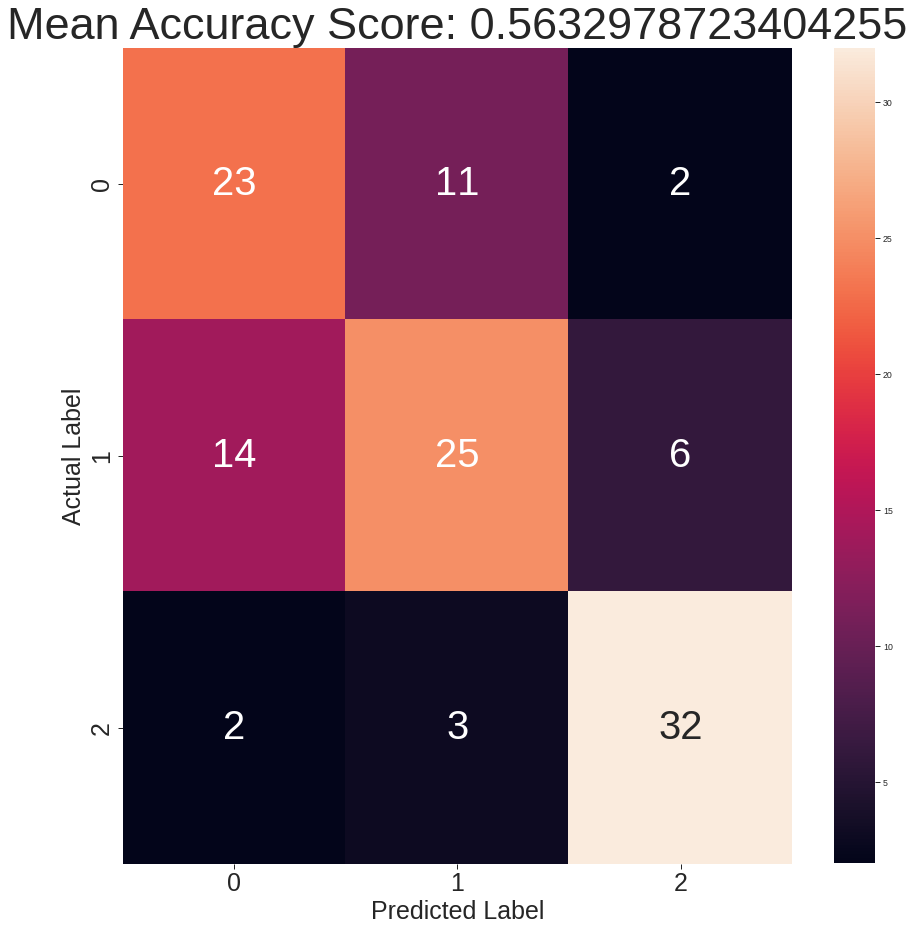

In [24]:
#visualize the confusion matrix 
plt.figure(figsize=(15,15))
heat_dt = sns.heatmap(cm_dt, annot=True, fmt='d', annot_kws={'size': 40});
plt.tick_params(axis='both', which='major', labelsize = 25);
plt.ylabel('Actual Label', size = 25);
plt.xlabel('Predicted Label', size = 25);
all_sample_title = 'Mean Accuracy Score: {0}'.format(score_dt.mean())
plt.title(all_sample_title, size = 45);

In [25]:
#calculate sensitivity, specificity, positive/negative predictive values, f1-score

from sklearn.metrics import f1_score
#f1 score is defined as: 2 * (precision * recall) / (precision + recall)

total=sum(sum(cm_dt))

sensitivity = cm_dt[0,0]/(cm_dt[0,0]+cm_dt[1,0])
print('Sensitivity is: ', sensitivity )

specificity = cm_dt[1,1]/(cm_dt[1,1]+cm_dt[0,1])
print('Specificity is: ', specificity)

ppv = cm_dt[0,0]/(cm_dt[0,0]+cm_dt[0,1])
print('ppv is: ', ppv )

npv = cm_dt[1,1]/(cm_dt[1,0]+cm_dt[1,1])
print('npv is: ', npv)

F1Score = f1_score(list(y_test.values), pred_dt, average='micro') #alternative averages include: binary, macro, weighted, samples
print('F1 Score is : ', F1Score)

Sensitivity is:  0.6216216216216216
Specificity is:  0.6944444444444444
ppv is:  0.6764705882352942
npv is:  0.6410256410256411
F1 Score is :  0.6779661016949152


In [26]:
#use package classification report for pre-calcualted values
print(classification_report(list(y_test.values), pred_dt))

              precision    recall  f1-score   support

           1       0.59      0.64      0.61        36
           2       0.64      0.56      0.60        45
           3       0.80      0.86      0.83        37

    accuracy                           0.68       118
   macro avg       0.68      0.69      0.68       118
weighted avg       0.68      0.68      0.67       118



#### **b) Algorithm 2 - kNN Classification**

In [ ]:
#time the execution of the code over 5 runs and 1000 loops
%%timeit -r5 -n1000

#implement a train-test split
X_train, X_test, y_train, y_test = train_test_split(normalized_pdac[normalized_pdac.columns[3:8]], normalized_pdac[normalized_pdac.columns[2]], test_size = 0.20, random_state = 25)

#apply feature scaling to dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#fit kNN classifier to dataset
from sklearn.neighbors import KNeighborsClassifier

y_train=y_train.astype('int')
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

5.48 ms ± 828 µs per loop (mean ± std. dev. of 5 runs, 1000 loops each)


In [ ]:
#demonstrate prediction
pred_knn = knn.predict(X_test)
print(pred_knn[:5])

[1 3 1 1 1]


In [ ]:
#time the operation
%%timeit -r1 -n1

#implmented stratified k-fold cross validation
kf_knn = StratifiedKFold(n_splits=10, shuffle=True, random_state=25)
cnt = 1
for train_index, test_index in kf_knn.split(X_train, y_train.astype('int')):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 424, Test set:48
Fold:2, Train set: 424, Test set:48
Fold:3, Train set: 425, Test set:47
Fold:4, Train set: 425, Test set:47
Fold:5, Train set: 425, Test set:47
Fold:6, Train set: 425, Test set:47
Fold:7, Train set: 425, Test set:47
Fold:8, Train set: 425, Test set:47
Fold:9, Train set: 425, Test set:47
Fold:10, Train set: 425, Test set:47
10.2 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [ ]:
#obtain the scores for each fold and the average
score_knn = cross_val_score(knn, X_train, y_train.astype('int'), cv= kf_knn, scoring="accuracy")

print(f'Scores for each fold are: {score_knn}')
print(f'Average score: {"{:.2f}".format(score_knn.mean())}')

Scores for each fold are: [0.6875     0.52083333 0.57446809 0.59574468 0.44680851 0.55319149
 0.63829787 0.53191489 0.61702128 0.68085106]
Average score: 0.58


In [ ]:
#generate and print a confusion matrix and visualize the results
cm_knn = confusion_matrix(list(y_test.values), pred_knn)
print(cm_knn)

[[23 12  1]
 [18 17 10]
 [ 6  7 24]]


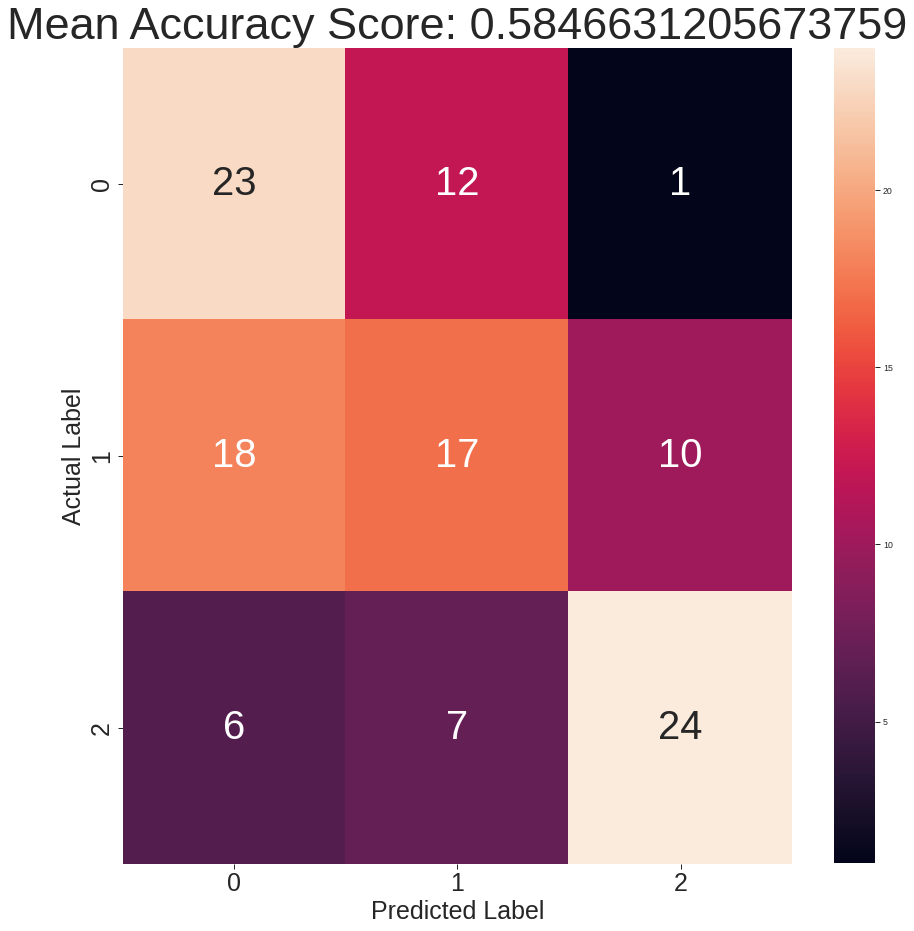

In [ ]:
#visualize the confusion matrix 
plt.figure(figsize=(15,15))
heat_knn = sns.heatmap(cm_knn, annot=True, fmt='d', annot_kws={'size': 40});
plt.tick_params(axis='both', which='major', labelsize = 25);
plt.ylabel('Actual Label', size = 25);
plt.xlabel('Predicted Label', size = 25);
all_sample_title = 'Mean Accuracy Score: {0}'.format(score_knn.mean())
plt.title(all_sample_title, size = 45);

In [ ]:
#calculate sensitivity, specificity, positive/negative predictive values, f1-score
sensitivity = cm_knn[0,0]/(cm_knn[0,0]+cm_knn[1,0])
print('Sensitivity is: ', sensitivity )

specificity = cm_knn[1,1]/(cm_knn[1,1]+cm_knn[0,1])
print('Specificity is: ', specificity)

ppv = cm_knn[0,0]/(cm_knn[0,0]+cm_knn[0,1])
print('ppv is: ', ppv )

npv = cm_knn[1,1]/(cm_knn[1,0]+cm_knn[1,1])
print('npv is: ', npv)

F1Score1 = f1_score(list(y_test.values), pred_knn, average='micro')
print('F1 Score is: ', F1Score1)

Sensitivity is:  0.5609756097560976
Specificity is:  0.5862068965517241
ppv is:  0.6571428571428571
npv is:  0.4857142857142857
F1 Score is:  0.5423728813559322


In [ ]:
#use package classification report for pre-calcualted values
print(classification_report(list(y_test.values), pred_knn))

              precision    recall  f1-score   support

           1       0.49      0.64      0.55        36
           2       0.47      0.38      0.42        45
           3       0.69      0.65      0.67        37

    accuracy                           0.54       118
   macro avg       0.55      0.56      0.55       118
weighted avg       0.54      0.54      0.54       118



#### **c) Algorithm 3 - Logistic Regression**

In [43]:
#time the execution of the code over 5 runs and 1000 loops
#%%timeit -r5 -n1000

#implement a train-test split
X_train, X_test, y_train, y_test = train_test_split(normalized_pdac[normalized_pdac.columns[3:8]], normalized_pdac[normalized_pdac.columns[2]], test_size = 0.20, random_state = 25)

#apply feature scaling to dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#fit Logistic Regression classifier to dataset
from sklearn.linear_model import LogisticRegression

y_train=y_train.astype('int')
logreg = LogisticRegression()
 
logreg.fit(X_train, y_train)

LogisticRegression()

In [44]:
#demonstrate prediction
pred_logreg = logreg.predict(X_test)
print(pred_logreg[:5])

[1 3 2 1 1]


In [46]:
#time the operation
#%%timeit -r1 -n1

#implmented stratified k-fold cross validation
kf_logreg = StratifiedKFold(n_splits=10, shuffle=True, random_state=25)
cnt = 1
for train_index, test_index in kf_logreg.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 424, Test set:48
Fold:2, Train set: 424, Test set:48
Fold:3, Train set: 425, Test set:47
Fold:4, Train set: 425, Test set:47
Fold:5, Train set: 425, Test set:47
Fold:6, Train set: 425, Test set:47
Fold:7, Train set: 425, Test set:47
Fold:8, Train set: 425, Test set:47
Fold:9, Train set: 425, Test set:47
Fold:10, Train set: 425, Test set:47


In [47]:
#obtain the scores for each fold and the average
score_logreg = cross_val_score(logreg, X_train, y_train, cv= kf_logreg, scoring="accuracy")

print(f'Scores for each fold are: {score_logreg}')
print(f'Average score: {"{:.2f}".format(score_logreg.mean())}')

Scores for each fold are: [0.64583333 0.54166667 0.46808511 0.68085106 0.4893617  0.61702128
 0.61702128 0.42553191 0.57446809 0.68085106]
Average score: 0.57


In [48]:
#generate and print a confusion matrix and visualize the results
cm_logreg = confusion_matrix(list(y_test.values), pred_logreg)
print(cm_logreg)

[[23  9  4]
 [21 16  8]
 [ 3  9 25]]


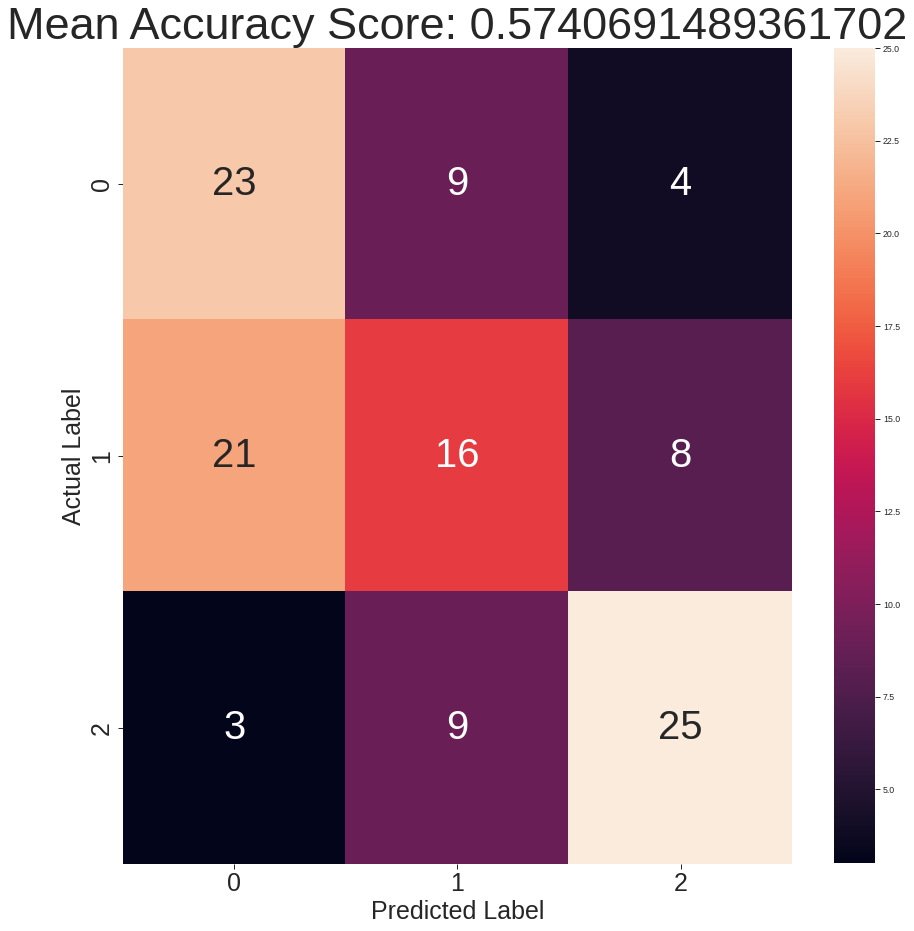

In [49]:
#visualize the confusion matrix 
plt.figure(figsize=(15,15))
heat_logreg = sns.heatmap(cm_logreg, annot=True, fmt='d', annot_kws={'size': 40});
plt.tick_params(axis='both', which='major', labelsize = 25);
plt.ylabel('Actual Label', size = 25);
plt.xlabel('Predicted Label', size = 25);
all_sample_title = 'Mean Accuracy Score: {0}'.format(score_logreg.mean())
plt.title(all_sample_title, size = 45);

In [50]:
#calculate sensitivity, specificity, positive/negative predictive values, f1-score
sensitivity = cm_logreg[0,0]/(cm_logreg[0,0]+cm_logreg[1,0])
print('Sensitivity is: ', sensitivity )

specificity = cm_logreg[1,1]/(cm_logreg[1,1]+cm_logreg[0,1])
print('Specificity is: ', specificity)

ppv = cm_logreg[0,0]/(cm_logreg[0,0]+cm_logreg[0,1])
print('ppv is: ', ppv )

npv = cm_logreg[1,1]/(cm_logreg[1,0]+cm_logreg[1,1])
print('npv is: ', npv)

F1Score1 = f1_score(list(y_test.values), pred_logreg, average='micro')
print('F1 Score is: ', F1Score1)

Sensitivity is:  0.5227272727272727
Specificity is:  0.64
ppv is:  0.71875
npv is:  0.43243243243243246
F1 Score is:  0.5423728813559322


In [ ]:
#use package classification report for pre-calcualted values
print(classification_report(list(y_test.values), pred_logreg))

              precision    recall  f1-score   support

           1       0.49      0.64      0.55        36
           2       0.47      0.36      0.41        45
           3       0.68      0.68      0.68        37

    accuracy                           0.54       118
   macro avg       0.55      0.56      0.54       118
weighted avg       0.54      0.54      0.54       118



#### **d) Algorithm 4 - Support Vector Machine**

In [28]:
#time the execution of the code over 5 runs and 1000 loops
#%%timeit -r5 -n1000

#implement a train-test split
X_train, X_test, y_train, y_test = train_test_split(normalized_pdac[normalized_pdac.columns[3:8]], normalized_pdac[normalized_pdac.columns[2]], test_size = 0.20, random_state = 25)

#apply feature scaling to dataset
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#fit Logistic Regression classifier to dataset
from sklearn.svm import SVC


y_train=y_train.astype('int')
svc = SVC(kernel='linear')

svc.fit(X_train, y_train)

SVC(kernel='linear')

In [29]:
#demonstrate prediction
pred_svc = svc.predict(X_test)
print(pred_svc[:5])

[1 3 1 1 1]


In [32]:
#time the operation
#%%timeit -r1 -n1

#implmented stratified k-fold cross validation
kf_svc = StratifiedKFold(n_splits=10, shuffle=True, random_state=25)
cnt = 1
for train_index, test_index in kf_svc.split(X_train, y_train):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 424, Test set:48
Fold:2, Train set: 424, Test set:48
Fold:3, Train set: 425, Test set:47
Fold:4, Train set: 425, Test set:47
Fold:5, Train set: 425, Test set:47
Fold:6, Train set: 425, Test set:47
Fold:7, Train set: 425, Test set:47
Fold:8, Train set: 425, Test set:47
Fold:9, Train set: 425, Test set:47
Fold:10, Train set: 425, Test set:47


In [33]:
#obtain the scores for each fold and the average
score_svc = cross_val_score(svc, X_train, y_train, cv= kf_svc, scoring="accuracy")

print(f'Scores for each fold are: {score_svc}')
print(f'Average score: {"{:.2f}".format(score_svc.mean())}')

Scores for each fold are: [0.6875     0.58333333 0.5106383  0.72340426 0.46808511 0.57446809
 0.61702128 0.46808511 0.4893617  0.65957447]
Average score: 0.58


In [34]:
#generate and print a confusion matrix and visualize the results
cm_svc = confusion_matrix(list(y_test.values), pred_svc)
print(cm_svc)

[[29  3  4]
 [25 12  8]
 [ 4  9 24]]


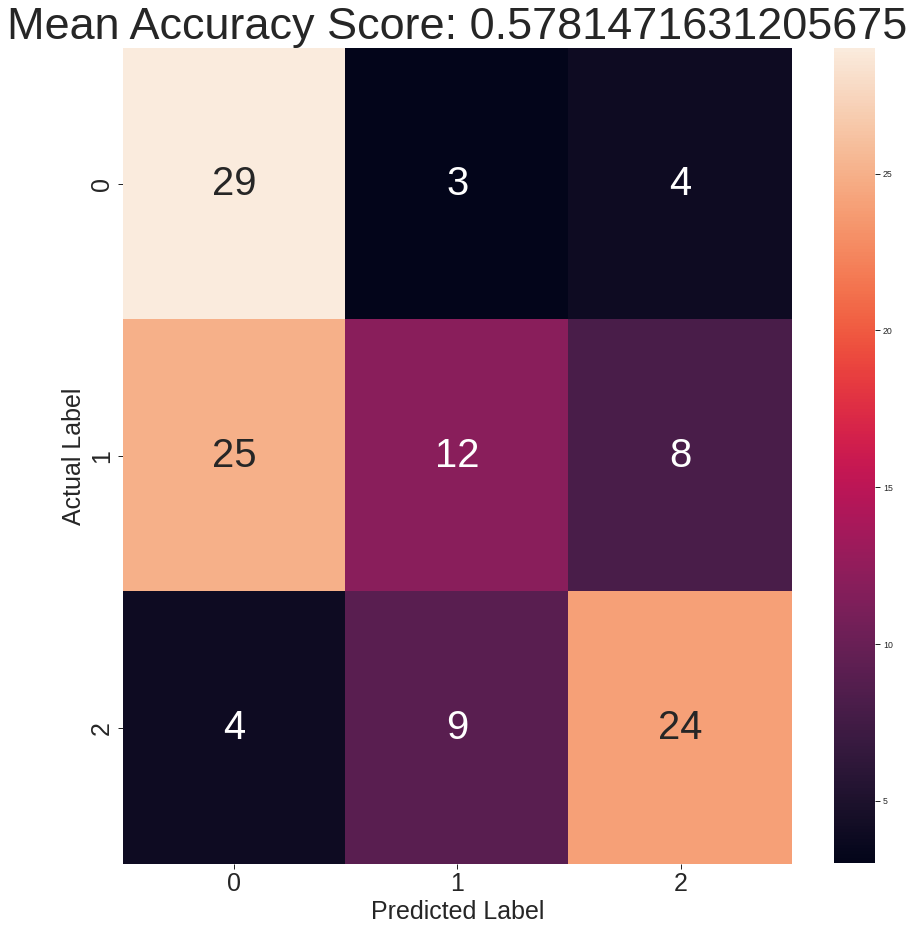

In [35]:
#visualize the confusion matrix 
plt.figure(figsize=(15,15))
heat_logreg = sns.heatmap(cm_svc, annot=True, fmt='d', annot_kws={'size': 40});
plt.tick_params(axis='both', which='major', labelsize = 25);
plt.ylabel('Actual Label', size = 25);
plt.xlabel('Predicted Label', size = 25);
all_sample_title = 'Mean Accuracy Score: {0}'.format(score_svc.mean())
plt.title(all_sample_title, size = 45);

In [40]:
#calculate sensitivity, specificity, positive/negative predictive values, f1-score
sensitivity = cm_svc[0,0]/(cm_svc[0,0]+cm_svc[1,0])
print('Sensitivity is: ', sensitivity )

specificity = cm_svc[1,1]/(cm_svc[1,1]+cm_svc[0,1])
print('Specificity is: ', specificity)

ppv = cm_svc[0,0]/(cm_svc[0,0]+cm_svc[0,1])
print('ppv is: ', ppv )

npv = cm_svc[1,1]/(cm_svc[1,0]+cm_svc[1,1])
print('npv is: ', npv)

F1Score1 = f1_score(list(y_test.values), pred_svc, average='micro')
print('F1 Score is: ', F1Score1)

Sensitivity is:  0.5370370370370371
Specificity is:  0.8
ppv is:  0.90625
npv is:  0.32432432432432434
F1 Score is:  0.5508474576271186


In [ ]:
#use package classification report for pre-calcualted values
print(classification_report(list(y_test.values), pred_svc))

              precision    recall  f1-score   support

           1       0.50      0.81      0.62        36
           2       0.50      0.27      0.35        45
           3       0.67      0.65      0.66        37

    accuracy                           0.55       118
   macro avg       0.56      0.57      0.54       118
weighted avg       0.55      0.55      0.53       118



In [37]:
#use package classification report for pre-calcualted values
print(classification_report(list(y_test.values), pred_svc))

              precision    recall  f1-score   support

           1       0.50      0.81      0.62        36
           2       0.50      0.27      0.35        45
           3       0.67      0.65      0.66        37

    accuracy                           0.55       118
   macro avg       0.56      0.57      0.54       118
weighted avg       0.55      0.55      0.53       118



### **---End of Code---**